<a href="https://colab.research.google.com/github/andylynchul/ET5003_Assignments/blob/master/Week%205/2028189_ET5003_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-05' #@param {type:"date"}


# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [5]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 4.2 MB/s 
     |████████████████████████████████| 71 kB 7.9 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565116 sha256=0c1bed5f98e2307af9e01f3bed02a61b2d97a1a0a12777073c7cf0e6d33dcc3c
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=c2a94a7ee09ae55f1d98a1a482da206083190ed4c5386196269279865e9f2934
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [10]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Path, copy the path from your Drive
Path = '/content/drive/MyDrive/Masters/Year2/ET5003/Week5/Data/'

# House Data
train_data = Path + 'HousePrice_Train.csv'
test_data = Path + 'HousePrice_Test.csv'
cost_data = Path + 'sample_submission.csv'

# train data
df_train = pd.read_csv(train_data)

# test data
df_test = pd.read_csv(test_data)

# test data
#df_cost = pd.read_csv(cost_data)

# test data
#df_test = df_test.join(df_cost.drop("Id", axis=1))


print(df_train.shape)
print(df_test.shape)
#print(df_cost.shape)

Mounted at /content/drive
(1638, 14)
(702, 13)


In [12]:
df_train.tail()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
1633,1634,12424903,Blackrock,1,2,C2,Built in c.1930 38 Stradbrook Road is a deligh...,"Parking,Gas Fired Central Heating,Alarm,Wheelc...",Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,bungalow,64.00,500000
1634,1635,12383142,Blackrock,3,5,C1,An impressive three-story family home superbly...,NaN,Gas fired central heating with underfloor heat...,53.284975,-6.178685,detached,175.96,795000
1635,1636,12426975,Lucan,2,3,A3,DNG Lucan's leading estate agents are delighte...,NaN,None,53.351667,-6.435278,semi-detached,98.00,340000
1636,1637,12198921,Sandymount,8,8,D2,Holyrood Castle is a most distinctive 19th cen...,NaN,None,53.328997,-6.221030,detached,507.00,2500000
1637,1638,12314237,Shankill,2,2,E1,A superb opportunity awaits to acquire this be...,NaN,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,semi-detached,50.00,370000


In [13]:
df_test.tail()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
697,2336,12392566,Kilmainham,1,1,G,Sherry FitzGerald is delighted to present 56 B...,NaN,Secure gated and well maintained development\n...,53.343377,-6.296654,apartment,40.0
698,2337,12352487,Stoneybatter,1,2,D2,26 Viking Road is a well presented and moderni...,NaN,Well presented and modernised extended two bed...,53.351074,-6.285557,terraced,57.0
699,2338,12387290,Cabinteely,1,3,D1,FIRST OPEN VIEW SATURDAY 8TH FEBRUARY 11 - 11....,"Parking,Gas Fired Central Heating",None,53.261710,-6.164979,semi-detached,93.0
700,2339,12382807,Clontarf,2,3,NaN,DNG are delighted to represent the sale of 109...,NaN,Gas fired central heating.\nFully renovated an...,53.360515,-6.189661,terraced,118.0
701,2340,12393769,Glenageary,1,3,F,This is an instantly appealing Jennings built ...,NaN,Drenched in natural light\nSuperb blank canvas...,53.280408,-6.132925,semi-detached,122.0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1638 non-null   int64  
 1   ID             1638 non-null   int64  
 2   Location       1638 non-null   object 
 3   Num_Bathrooms  1638 non-null   int64  
 4   Num_Beds       1638 non-null   int64  
 5   BER_class      1387 non-null   object 
 6   Description    1638 non-null   object 
 7   Services       577 non-null    object 
 8   Features       1638 non-null   object 
 9   Latitude       1638 non-null   float64
 10  Longitude      1638 non-null   float64
 11  Type           1638 non-null   object 
 12  Surface        1638 non-null   float64
 13  Price          1638 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 179.3+ KB


In [15]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,1638.0,8.195000e+02,472.994186,1.000000e+00,4.102500e+02,8.195000e+02,1.228750e+03,1.638000e+03
ID,1638.0,1.231930e+07,144754.041968,1.118567e+07,1.228104e+07,1.238055e+07,1.240548e+07,1.242836e+07
Num_Bathrooms,1638.0,2.054335e+00,1.241259,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
Num_Beds,1638.0,3.043346e+00,1.379650,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01
Latitude,1638.0,5.335047e+01,0.076832,5.250186e+01,5.329426e+01,5.334139e+01,5.338203e+01,5.363059e+01
Longitude,1638.0,-6.255086e+00,0.144430,-6.497000e+00,-6.309613e+00,-6.247780e+00,-6.193982e+00,-1.744995e+00
Surface,1638.0,1.695407e+02,1791.793934,3.400000e+00,7.300000e+01,9.705000e+01,1.350000e+02,7.223639e+04
Price,1638.0,5.547196e+05,565203.162814,1.999500e+04,2.950000e+05,3.950000e+05,5.950000e+05,8.900000e+06


In [16]:
# Use this to get some high level information about the missing data
df_train.isna().sum()

Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64

In [17]:
# Find the number of nulls/NaNs in the dataset as a percentage to see if any columns need to be considered for removal
print("Read of missing values as percentage of data set")
df_train.isna().sum()*100/len(df_train)

Read of missing values as percentage of data set


Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64

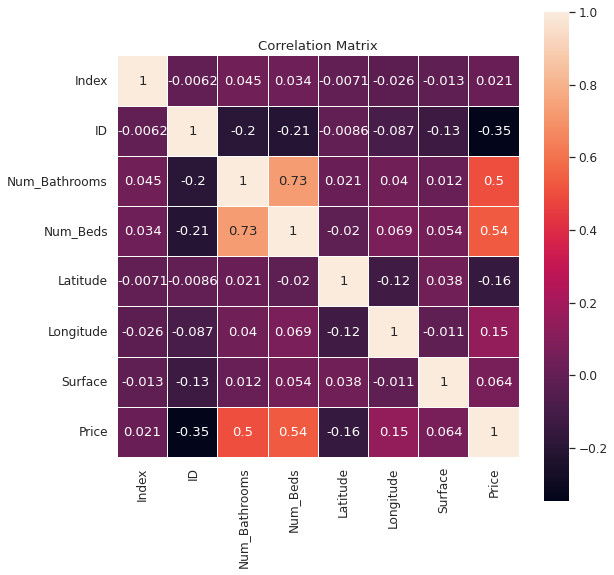

In [18]:
# calculate the correlation matrix
corr = df_train.corr()

# plot the heatmap
sns.set(font_scale=1.10)
plt.figure(figsize=(9, 9))
plt.title('Correlation Matrix')
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,linewidths=0.01,square=True,annot=True)

Pairplots of numerical features


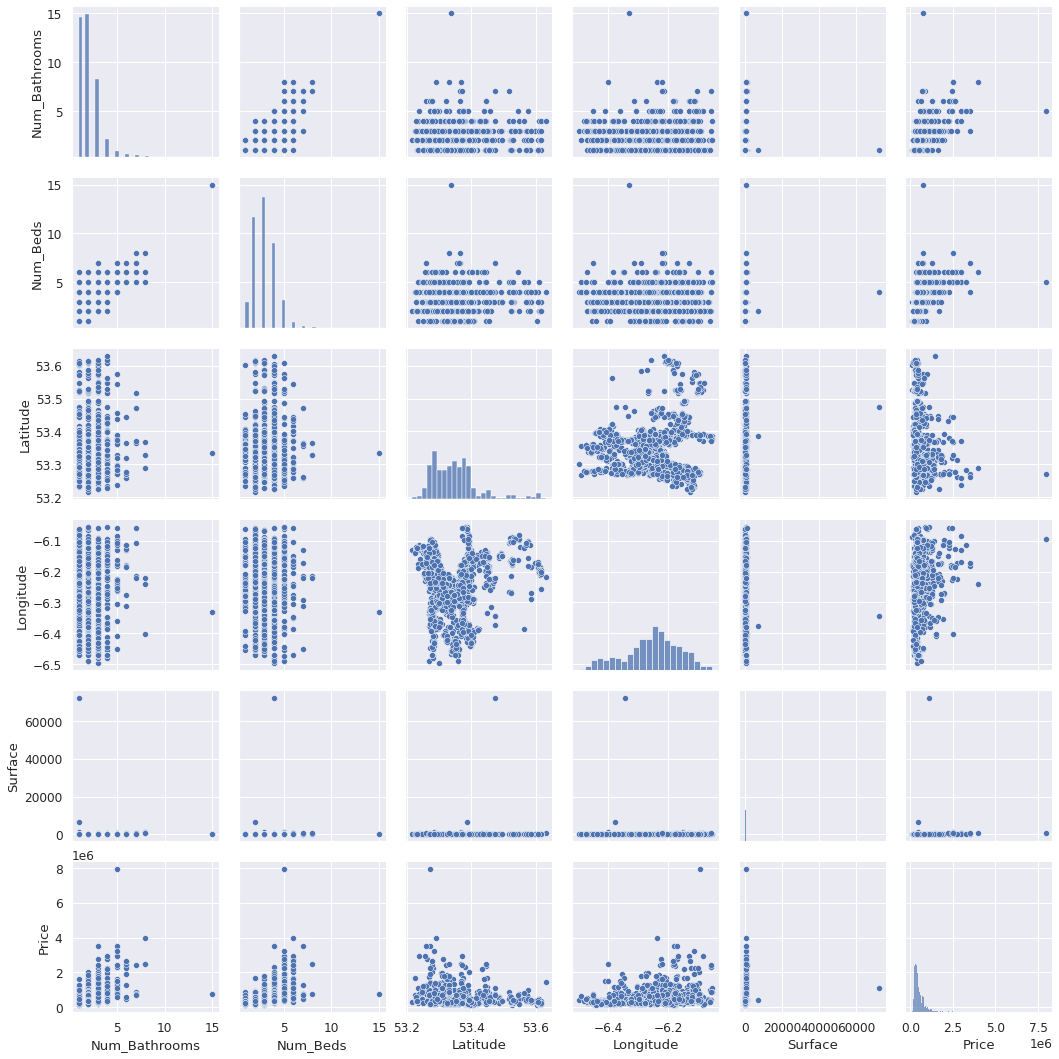

In [19]:
# Pairplot to see the relationship between numerical features. The method dropna() drops all rows with missing values 
# No of units and facility are removed due to high number of NULL values
print('Pairplots of numerical features')
sns.pairplot(data=df_train[['Num_Bathrooms','BER_class','Num_Beds','Latitude','Longitude','Surface','Price']].dropna())
plt.show()

In [20]:
# Get a read of Categorical Values
cat_cols = df_train.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

Castleknock    57
Malahide       50
Lucan          49
Rathfarnham    46
Clondalkin     41
               ..
Coolmine        1
Oldbawn         1
Kilmore         1
Smithfield      1
Newcastle       1
Name: Location, Length: 142, dtype: int64 

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64 

Sherry FitzGerald are delighted to present this excellent 3 bedroom, 3 storey mid terrace family home to the market. Situated in this increasingly popular development on the edge of the expansive Phoenix Park, within a short stroll of Castleknock Village and Ashtown Train Station which serves 

In [21]:
drop_features = ['Surface','Index','ID','Services']
nlp_features = ['Features','Description']

# Strip out the NLP Features
#df_train_nlp = df_train[nlp_features]

#Drop the NLP Features & Low Value Features
df_train_eda = df_train.drop(drop_features, axis=1)

# Get a read of remaining Categorical Values
cat_cols = df_train_eda.select_dtypes(include=['object'])     #strip out the categorical cols
cat_cols.columns[cat_cols.any()].tolist()           #convert col names to list
for i in cat_cols:                                  #loop through the cols
    print(cat_cols[i].value_counts(),"\n")          #print the summary to analyse

Castleknock    57
Malahide       50
Lucan          49
Rathfarnham    46
Clondalkin     41
               ..
Coolmine        1
Oldbawn         1
Kilmore         1
Smithfield      1
Newcastle       1
Name: Location, Length: 142, dtype: int64 

D1                     182
D2                     173
C3                     154
C2                     144
C1                     133
E1                     110
G                      103
E2                     101
F                       89
B3                      78
B2                      48
A3                      37
SINo666of2006exempt     15
A2                      12
B1                       7
A1                       1
Name: BER_class, dtype: int64 

Sherry FitzGerald are delighted to present this excellent 3 bedroom, 3 storey mid terrace family home to the market. Situated in this increasingly popular development on the edge of the expansive Phoenix Park, within a short stroll of Castleknock Village and Ashtown Train Station which serves 

In [22]:
#Calculate missing values for the numerical features.
print(df_train.select_dtypes(exclude=['object']).isna().sum())

Index            0
ID               0
Num_Bathrooms    0
Num_Beds         0
Latitude         0
Longitude        0
Surface          0
Price            0
dtype: int64


In [23]:
# Convert BER classification into ordinal features
# Map BER categories 
if 'BER_class' in df_train_eda:
  BERMap = {
      "A1": 1,
      "A2": 2,
      "A3": 3,
      "B1": 4,
      "B2": 5,
      "B3": 6,
      "C1": 7,
      "C2": 8,
      "C3": 9,
      "D1": 10,
      "D2": 11,
      "E1": 12,
      "E2": 13,
      "F": 14,
      "G": 15,
      "SINo666of2006exempt" : 0
  }
  df_train_eda['BER_class'] = df_train_eda['BER_class'].replace(BERMap)


In [24]:
# Replace 'N/A' values in ber_classification with mean of the same property category
if 'BER_class' in df_train_eda:
  ber_avg_val = round(df_train_eda['BER_class'].mean(),0) # mean of ber classification rounded to the nearest whole number. 

  df_train_eda['BER_class'].fillna(ber_avg_val, inplace=True) # Only 2nd hand properties are missing BER. Therefore, we input the average for 2nd hand ones

  print("BER classification replacing missing values for 2nd hand properties: ",ber_avg_val)

BER classification replacing missing values for 2nd hand properties:  10.0


In [25]:
#one hot encode all the remaining categorical fields

if 'Type' in df_train_eda:
  # creating instance of one-hot-encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  #enc_df_train = pd.DataFrame(enc.fit_transform(df_train_p[['property_type']]).toarray())
  #df_train_p = df_train_p.join(enc_df_train)

  #enc_df_test  = pd.DataFrame(enc.fit_transform(df_test_p[['property_type']]).toarray())
  #df_test_p = df_test_p.join(enc_df_test)

  # now one-hot encode all categorical columns with nan
  df_train_eda = pd.get_dummies(df_train_eda, columns=['Type'], 
                          dummy_na=True, 
                          drop_first=True)

  # now one-hot encode all categorical columns with nan
  #df_test_p = pd.get_dummies(df_test_p, columns=['property_type'], 
                          #dummy_na=True, 
                          #drop_first=True)

print(df_train_eda.tail())

        Location  Num_Bathrooms  ...  Type_townhouse  Type_nan
1633   Blackrock              1  ...               0         0
1634   Blackrock              3  ...               0         0
1635       Lucan              2  ...               0         0
1636  Sandymount              8  ...               0         0
1637    Shankill              2  ...               0         0

[5 rows x 19 columns]


In [26]:
#one hot encode all the remaining categorical fields

if 'Location' in df_train_eda:
  # creating instance of one-hot-encoder
  enc = OneHotEncoder(handle_unknown='ignore')

  #enc_df_train = pd.DataFrame(enc.fit_transform(df_train_p[['property_type']]).toarray())
  #df_train_p = df_train_p.join(enc_df_train)

  #enc_df_test  = pd.DataFrame(enc.fit_transform(df_test_p[['property_type']]).toarray())
  #df_test_p = df_test_p.join(enc_df_test)

  # now one-hot encode all categorical columns with nan
  df_train_eda = pd.get_dummies(df_train_eda, columns=['Location'], 
                          dummy_na=True, 
                          drop_first=True)

  # now one-hot encode all categorical columns with nan
  #df_test_p = pd.get_dummies(df_test_p, columns=['property_type'], 
                          #dummy_na=True, 
                          #drop_first=True)

print(df_train_eda.tail())

      Num_Bathrooms  Num_Beds  ...  Location_Windy Arbour Location_nan
1633              1         2  ...                      0            0
1634              3         5  ...                      0            0
1635              2         3  ...                      0            0
1636              8         8  ...                      0            0
1637              2         2  ...                      0            0

[5 rows x 160 columns]


In [27]:
# First filter out those rows that
# do not contain any data

print(df_train_eda.select_dtypes(exclude=['object']).isna().sum())

Num_Bathrooms            0
Num_Beds                 0
BER_class                0
Latitude                 0
Longitude                0
                        ..
Location_Tyrrelstown     0
Location_Walkinstown     0
Location_Whitehall       0
Location_Windy Arbour    0
Location_nan             0
Length: 158, dtype: int64


In [28]:
df_train_eda.tail()

,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Price,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse,Type_nan,Location_Ard Na Greine,Location_Artane,Location_Ashtown,Location_Balbriggan,Location_Baldoyle,Location_Balgriffin,Location_Ballinteer,Location_Ballsbridge,Location_Ballybough,Location_Ballyboughal,Location_Ballybrack,Location_Ballycullen,Location_Ballyfermot,Location_Ballymun,Location_Balrothery,Location_Beaumont,Location_Blackrock,Location_Blanchardstown,Location_Bluebell,Location_Booterstown,Location_Brittas,Location_Cabinteely,...,Location_Park West,Location_Perrystown,Location_Phibsborough,Location_Portmarnock,Location_Portobello,Location_Raheny,Location_Ranelagh,Location_Rathcoole,Location_Rathfarnham,Location_Rathgar,Location_Rathmichael,Location_Rathmines,Location_Rialto,Location_Ringsend,Location_Rush,Location_Saggart,Location_Sallynoggin,Location_Sandycove,Location_Sandyford,Location_Sandymount,Location_Santry,Location_Shankill,Location_Skerries,Location_Smithfield,Location_South Circular Road,Location_Stepaside,Location_Stoneybatter,Location_Sutton,Location_Swords,Location_Tallaght,Location_Temple Bar,Location_Templeogue,Location_Terenure,Location_The Coombe,Location_The Ward,Location_Tyrrelstown,Location_Walkinstown,Location_Whitehall,Location_Windy Arbour,Location_nan
1633,1,2,8.0,Built in c.1930 38 Stradbrook Road is a deligh...,Extremely convenient location \nWheelchair acc...,53.292767,-6.166668,500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1634,3,5,7.0,An impressive three-story family home superbly...,Gas fired central heating with underfloor heat...,53.284975,-6.178685,795000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1635,2,3,3.0,DNG Lucan's leading estate agents are delighte...,None,53.351667,-6.435278,340000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1636,8,8,11.0,Holyrood Castle is a most distinctive 19th cen...,None,53.328997,-6.221030,2500000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1637,2,2,12.0,A superb opportunity awaits to acquire this be...,Turn key condition\nWood burning stove\nSlider...,53.231438,-6.125022,370000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Detection / Removal of Outliers

In [29]:
# Function to Detection Outlier on one-dimentional datasets.
def remove_outliers(dframe, feature):
    '''Function to Detect / Remove Outliers'''
  
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(dframe[feature])
    random_data_mean = np.mean(dframe[feature])
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    dframe = dframe.drop(dframe[(dframe[feature] < lower_limit) | (dframe[feature] > upper_limit)].index)

    return dframe

def plot_box_hist(dframe, features):
    '''Function to plot Box / Histogram pair for any feature'''
    no_feats = len(features)
  
    figH = plt.figure(figsize=(30,no_feats*5))

    for i in range(0, no_feats): 
        ax1 = figH.add_subplot(no_feats, 2, (i*2)+1)
        ax1.set_title("Boxplot of "+features[i])
        dframe.boxplot(column=[features[i]])

        ax2 = figH.add_subplot(no_feats, 2, (i*2)+2)
        ax2.set_title("Histogram of "+features[i])
        dframe[features[i]].hist(bins=20)

    plt.show()

Analysis of outliers


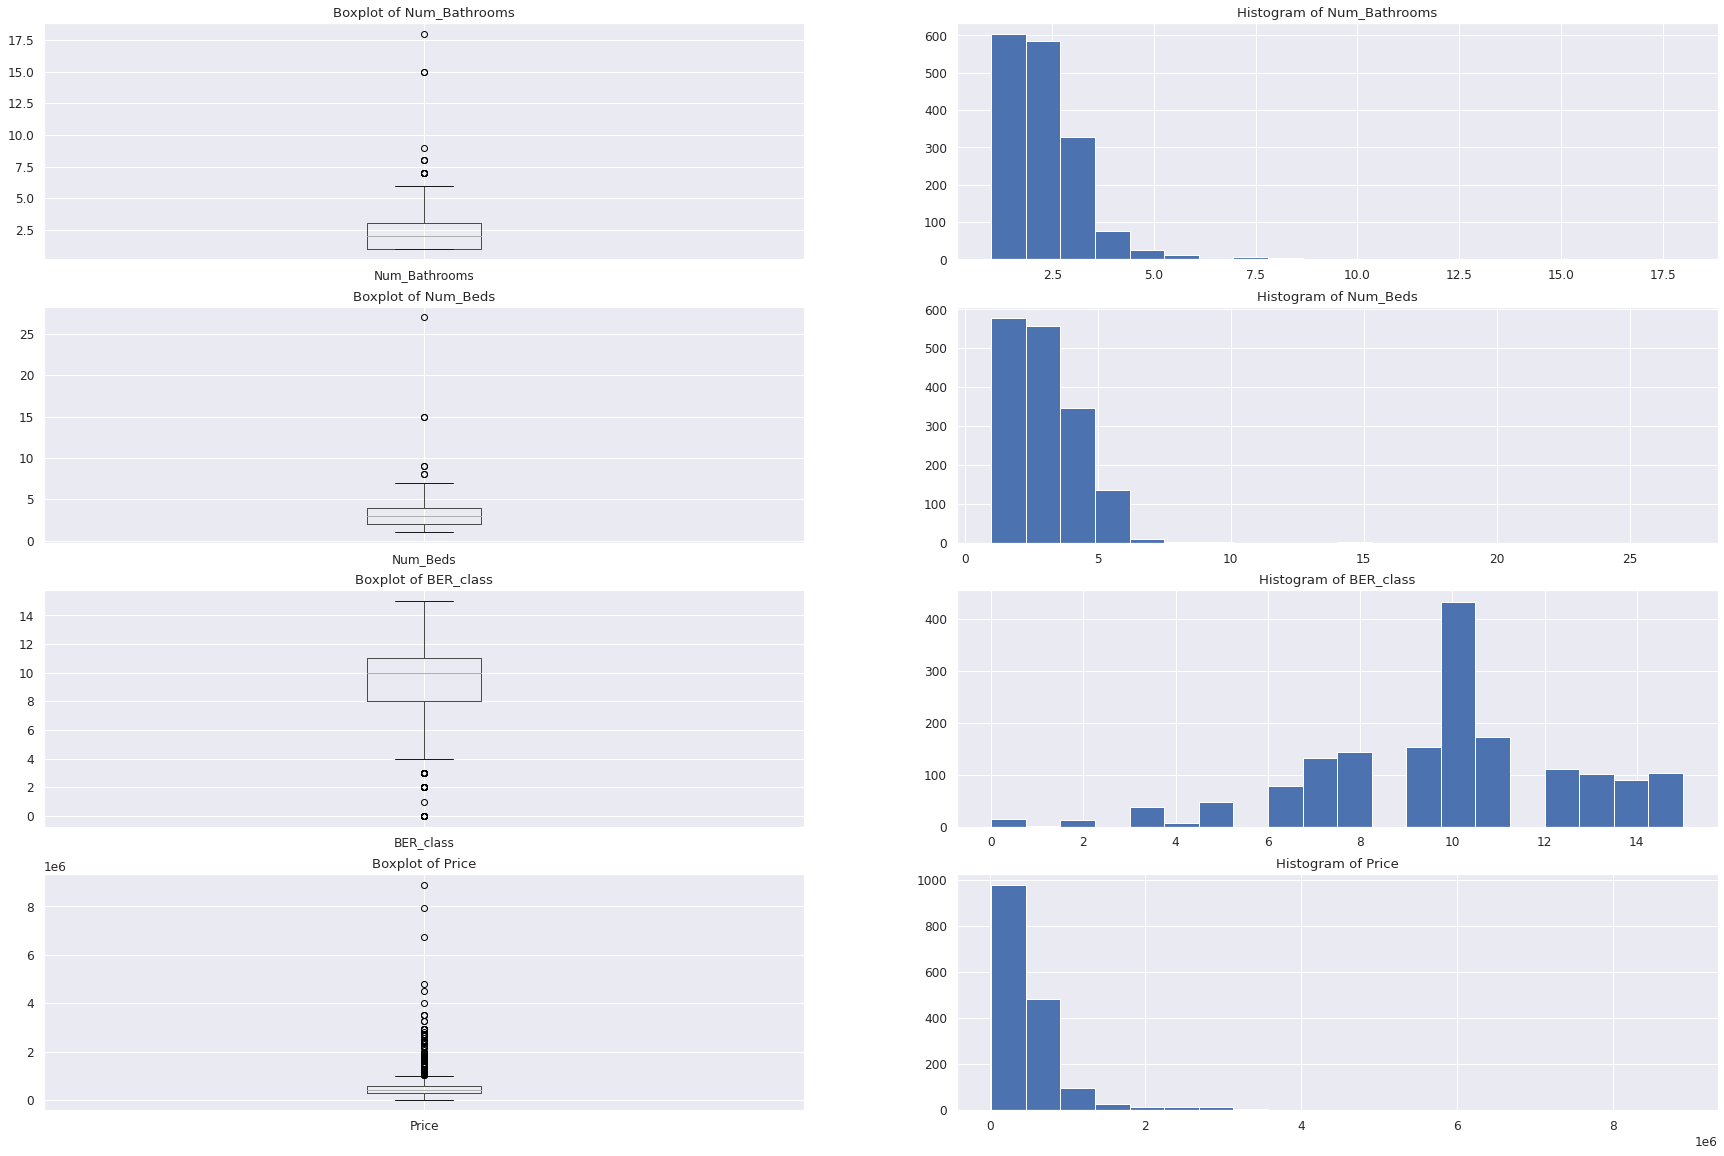

(1638, 160)
After outliers have been removed


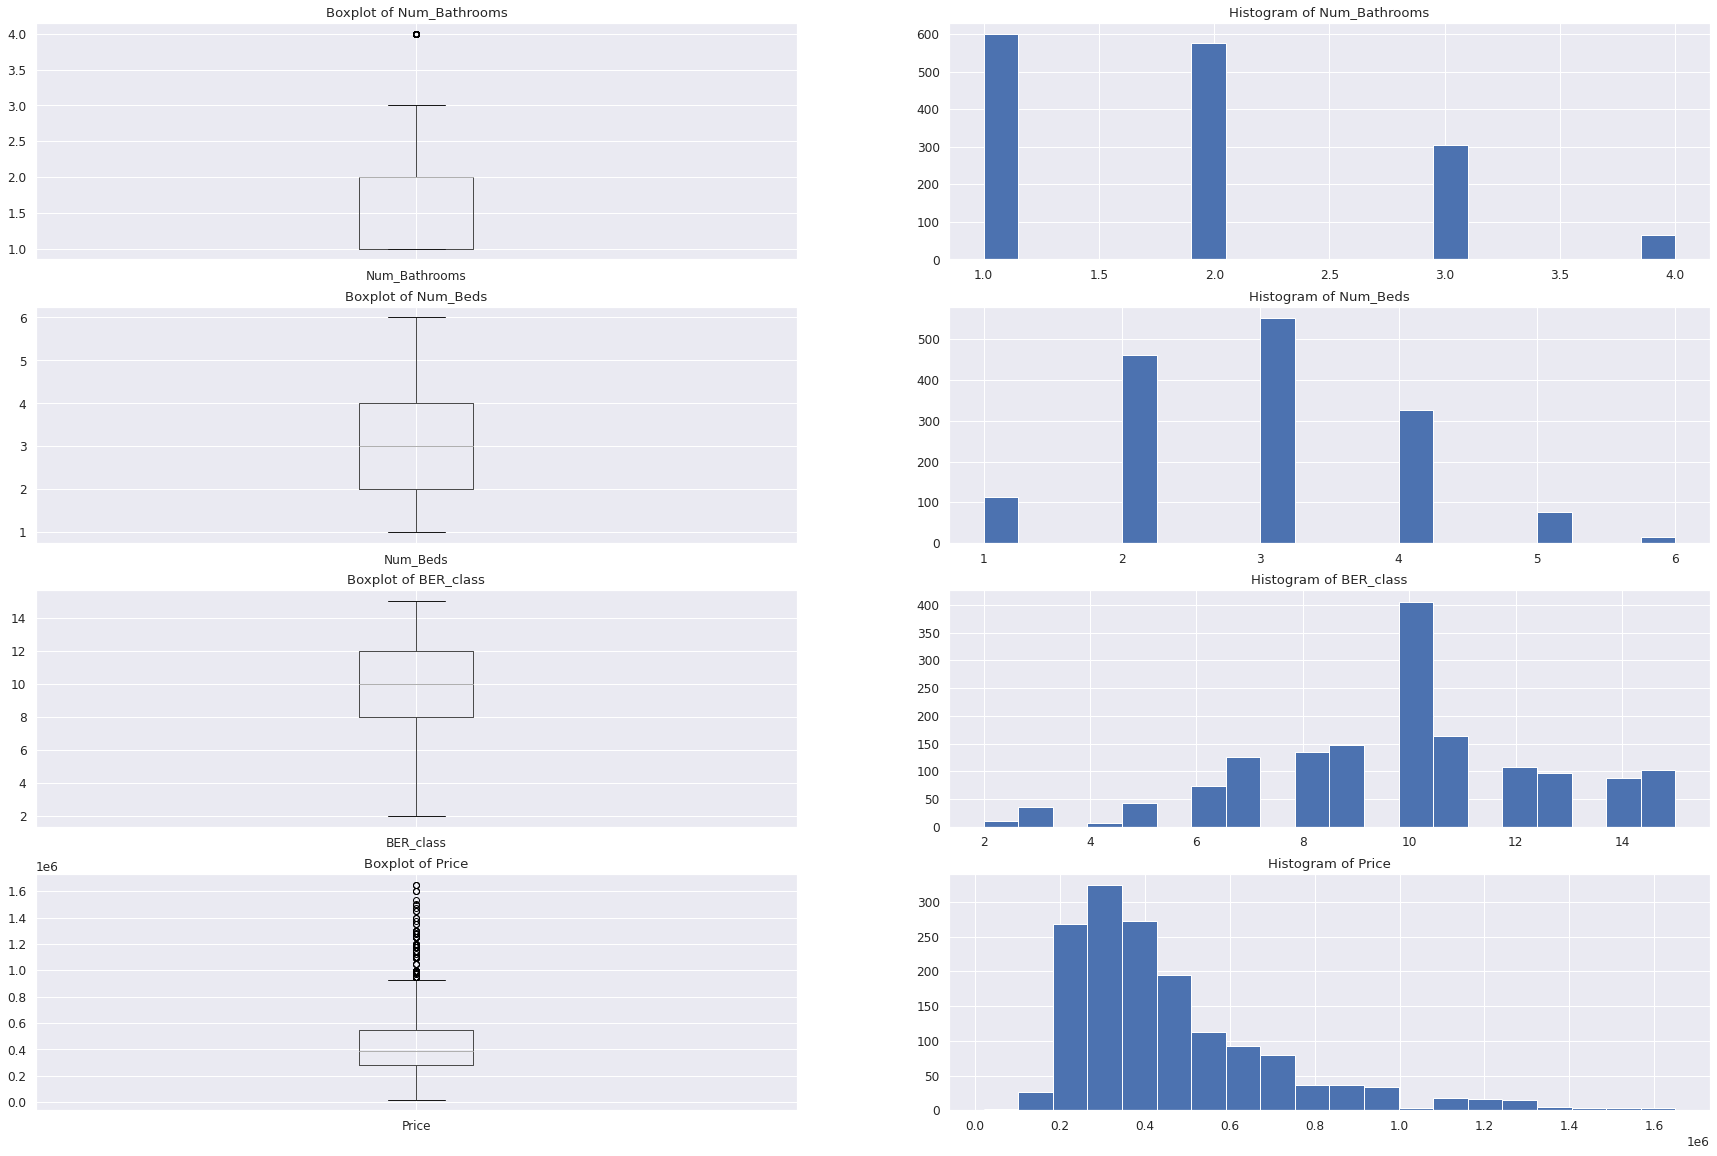

(1542, 160)


In [30]:
#Select features to include in plots
include_featues = ['Num_Bathrooms','Num_Beds','BER_class', 'Price']

#run print function
print("Analysis of outliers")
plot_box_hist(df_train_eda, include_featues)
print(df_train_eda.shape)

print("After outliers have been removed")
for i in range(0, len(include_featues)): 
    df_train_eda = remove_outliers(df_train_eda,include_featues[i])
    if (include_featues[i] != 'Price'):
      df_train_eda = remove_outliers(df_train_eda,include_featues[i])

#run print function
plot_box_hist(df_train_eda, include_featues)
print(df_train_eda.shape)

## Longitude / Latitide Outliers

In [31]:
print("Before...", df_train_eda.shape)

index_train = df_train_eda[(df_train_eda['Longitude'] > -6.0)|(df_train_eda['Latitude'] < 53.0)].index
df_train_eda.drop(index_train, inplace=True)

print("After...", df_train_eda.shape)

Before... (1542, 160)
After... (1541, 160)


# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

In [32]:
# Strip out the NLP Features
df_train_nlp = df_train_eda[nlp_features]

In [79]:
df_train_nlp.head(5)

,Features,Description
0,,delighted present market chipping bedroom apar...
1,bight spacious interior numerous original feat...,northbrook terrace charming brick period seclu...
2,special features large garden generous street ...,welcome cotter close immaculately presented th...
3,wonderful detached bungalow accommodation exte...,welcome sycamore enjoying premier address smal...
4,detached property double glazed windows double...,seasons comes market wonderful opportunity see...


In [33]:
df_train_nlp.describe() 

,Features,Description
count,1541,1541
unique,1052,1541
top,None,DNG are delighted to present a spacious four b...
freq,485,1


In [34]:
# Removing stopwords and stemming
# a stem must be a word
# Example:  fishing, fished, and fisher: stem -> fish
# choose English as the target language
stemmer = SnowballStemmer('english', ignore_stopwords=False)

In [35]:
# Stop words are basically a set of commonly used words in any language
# https://en.wikipedia.org/wiki/Stop_word
# and are filtered out before processing of natural language data 
# Example list: https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
#print(df_train_nlp)
# remove anything that is not a letter in the Description
for feature in df_train_nlp:
  # removing spaces
  df_train_nlp[feature] = df_train_nlp[feature].str.replace("[^a-zA-Z#]", " ")
  
  # transforming to lowercase
  df_train_nlp[feature] = df_train_nlp[feature].apply(lambda x: x.lower())

  # Removing single letters
  df_train_nlp[feature] = df_train_nlp[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
  
  # removing short words
  short_word = 4
  df_train_nlp[feature] = df_train_nlp[feature].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # Tokenisation
  tokenised_doc = df_train_nlp[feature].apply(lambda x: x.split())

  # remove stop-words
  tokenised_doc = tokenised_doc.apply(lambda x: [item for item in x if item not in stop_words])

 # de-tokenization
  detokenized_doc = []
  for i,token in enumerate(tokenised_doc):
    #print(i,token)
    t = ' '.join(token)
    detokenized_doc.append(t)

  # Replace feature with the de-tokenised text
  #print("Idx {} Len of detok {}".format(i, len(detokenized_doc)))
  df_train_nlp[feature] = detokenized_doc



In [37]:
df_train_nlp.head(20)

,Features,Description
0,,delighted present market chipping bedroom apar...
1,bight spacious interior numerous original feat...,northbrook terrace charming brick period seclu...
2,special features large garden generous street ...,welcome cotter close immaculately presented th...
3,wonderful detached bungalow accommodation exte...,welcome sycamore enjoying premier address smal...
4,detached property double glazed windows double...,seasons comes market wonderful opportunity see...
5,,property lappin estates great pleasure present...
6,first floor purpose built apartment setting de...,marlborough court bright spacious bedroom firs...
7,magnificent detached victorian villa dating ci...,outstanding detached victorian villa dating ci...
8,,cooke auctioneers excited present bright moder...
9,,needles cottage located southern slopes howth ...


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, smooth_idf=True)

print(vectorizer)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=300,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


In [78]:
df_train_nlp['Features']

0                                                        
1       bight spacious interior numerous original feat...
2       special features large garden generous street ...
3       wonderful detached bungalow accommodation exte...
4       detached property double glazed windows double...
                              ...                        
1632                                                     
1633    extremely convenient location wheelchair acces...
1634    fired central heating underfloor heating groun...
1635                                                     
1637    condition burning stove sliderobes principal b...
Name: Features, Length: 1541, dtype: object

In [39]:
X = vectorizer.fit_transform(df_train_nlp['Features'])
X.shape

(1541, 300)

In [40]:
# array mapping from feature integer indices to feature name
int2feature = vectorizer.get_feature_names()
print(int2feature)

['abundance', 'access', 'accommodation', 'acres', 'address', 'adjacent', 'airport', 'alarm', 'alarmed', 'allocated', 'amenities', 'ample', 'annum', 'apartment', 'appliances', 'approx', 'approximately', 'areas', 'aspect', 'attic', 'attractive', 'available', 'avenue', 'balbriggan', 'balconies', 'balcony', 'bathroom', 'bathrooms', 'beach', 'beautiful', 'beautifully', 'bedroom', 'bedrooms', 'blackrock', 'blinds', 'block', 'boiler', 'brick', 'bright', 'built', 'bungalow', 'burglar', 'canal', 'carpets', 'castleknock', 'ceiling', 'ceilings', 'central', 'centre', 'charge', 'charming', 'choice', 'circa', 'clontarf', 'close', 'cobble', 'communal', 'company', 'condition', 'contemporary', 'convenient', 'conversion', 'convert', 'converted', 'corner', 'courtyard', 'curtains', 'decorated', 'design', 'designated', 'designed', 'desirable', 'detached', 'development', 'dining', 'distance', 'doors', 'doorstep', 'double', 'downstairs', 'drive', 'driveway', 'dublin', 'dundrum', 'duplex', 'efficient', 'elect

In [41]:
# new dataset
new_dataset = pd.DataFrame(data=np.hstack([X.toarray()]), columns=int2feature)
print(new_dataset)

      abundance    access  accommodation  ...  wonderful  wooden  years
0           0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
1           0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
2           0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
3           0.0  0.142583       0.157252  ...   0.225673     0.0    0.0
4           0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
...         ...       ...            ...  ...        ...     ...    ...
1536        0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
1537        0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
1538        0.0  0.170635       0.000000  ...   0.000000     0.0    0.0
1539        0.0  0.000000       0.000000  ...   0.000000     0.0    0.0
1540        0.0  0.185261       0.000000  ...   0.000000     0.0    0.0

[1541 rows x 300 columns]


In [77]:
df_train_nlp['Description']

0       delighted present market chipping bedroom apar...
1       northbrook terrace charming brick period seclu...
2       welcome cotter close immaculately presented th...
3       welcome sycamore enjoying premier address smal...
4       seasons comes market wonderful opportunity see...
                              ...                        
1632    property partners obrien swaine proud offer st...
1633    built stradbrook delightful bedroom double fro...
1634    impressive three story family superbly located...
1635    lucan leading estate agents delighted present ...
1637    superb opportunity awaits acquire beautiful bi...
Name: Description, Length: 1541, dtype: object

In [74]:
X_desc = vectorizer.fit_transform(df_train_nlp['Description'])
X_desc.shape

(1541, 300)

In [75]:
# array mapping from feature integer indices to feature name
int2desc = vectorizer.get_feature_names()
print(int2desc)

['abundance', 'accessed', 'accessible', 'additional', 'agents', 'airport', 'alarm', 'amenity', 'ample', 'apartment', 'appeal', 'appliances', 'appointment', 'approx', 'approximately', 'areas', 'array', 'aspect', 'attic', 'attractive', 'auctioneers', 'available', 'avenue', 'balcony', 'basin', 'beautiful', 'beautifully', 'benefit', 'benefits', 'blackrock', 'block', 'boasts', 'boiler', 'breakfast', 'brick', 'briefly', 'bright', 'bring', 'business', 'buyers', 'cafes', 'carpet', 'carpeted', 'ceiling', 'ceilings', 'central', 'ceramic', 'choice', 'close', 'clubs', 'college', 'comes', 'communal', 'complete', 'comprising', 'condition', 'convenience', 'convenient', 'conversion', 'cooke', 'corner', 'coving', 'cubicle', 'current', 'delighted', 'designated', 'designed', 'detached', 'development', 'directions', 'dishwasher', 'distance', 'doors', 'doorstep', 'downstairs', 'drive', 'driveway', 'dryer', 'dundrum', 'early', 'easily', 'electric', 'enjoys', 'ensuite', 'estate', 'excellent', 'extend', 'exte

In [76]:
# new dataset
desc_dataset = pd.DataFrame(data=np.hstack([X_desc.toarray()]), columns=int2desc)
print(desc_dataset)

      abundance  accessed  accessible  ...  wonderful    wooden  years
0      0.000000  0.000000    0.000000  ...   0.000000  0.000000    0.0
1      0.000000  0.097785    0.183853  ...   0.000000  0.000000    0.0
2      0.000000  0.000000    0.000000  ...   0.059213  0.063402    0.0
3      0.000000  0.000000    0.000000  ...   0.232523  0.000000    0.0
4      0.000000  0.061652    0.000000  ...   0.095575  0.000000    0.0
...         ...       ...         ...  ...        ...       ...    ...
1536   0.130085  0.000000    0.000000  ...   0.214148  0.343950    0.0
1537   0.000000  0.000000    0.000000  ...   0.000000  0.000000    0.0
1538   0.000000  0.000000    0.099365  ...   0.000000  0.000000    0.0
1539   0.000000  0.000000    0.000000  ...   0.000000  0.000000    0.0
1540   0.000000  0.000000    0.000000  ...   0.112651  0.000000    0.0

[1541 rows x 300 columns]


In [42]:
df_train_full = pd.concat([df_train_eda, new_dataset], axis=1)

print(df_train_eda.shape)
print(new_dataset.shape)
print(df_train_full.shape)

print(df_train_full.head)

(1541, 160)
(1541, 300)
(1628, 460)
<bound method NDFrame.head of       Num_Bathrooms  Num_Beds  BER_class  ... wonderful wooden  years
0               2.0       2.0        9.0  ...  0.000000    0.0    0.0
1               1.0       2.0       10.0  ...  0.000000    0.0    0.0
2               3.0       3.0        3.0  ...  0.000000    0.0    0.0
3               1.0       3.0       12.0  ...  0.225673    0.0    0.0
4               3.0       4.0       10.0  ...  0.000000    0.0    0.0
...             ...       ...        ...  ...       ...    ...    ...
1632            1.0       1.0       10.0  ...       NaN    NaN    NaN
1633            1.0       2.0        8.0  ...       NaN    NaN    NaN
1634            3.0       5.0        7.0  ...       NaN    NaN    NaN
1635            2.0       3.0        3.0  ...       NaN    NaN    NaN
1637            2.0       2.0       12.0  ...       NaN    NaN    NaN

[1628 rows x 460 columns]>


## Training & Test Data Preparation



In [43]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['Num_Bathrooms','Num_Beds','BER_class', 'Longitude', 'Latitude', 'Price', 'Features','Description' ]
# dropna: remove missing values

print(df_train_full.shape)

df_train_eda = df_train_full[featrain].drop(nlp_features, axis=1)
#df_train_eda = df_train_eda[featrain].drop(nlp_features, axis=1)

df_subset_train = df_train_eda.dropna(axis=0)

df_cost = df_subset_train['Price']

df_subset_train = df_subset_train.drop(['Price'], axis=1)

#df_subset_train = pd.concat([df_subset_train,df_train_nlp])

print(df_subset_train.shape)
print(df_cost.shape)

(1628, 460)
(1541, 5)
(1541,)


In [44]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(df_subset_train, df_cost, test_size=0.2)

### Train dataset

In [45]:
# show first data frame rows 
X_train.head()

,Num_Bathrooms,Num_Beds,BER_class,Longitude,Latitude
378,3.0,5.0,15.0,-6.270243,53.329246
937,2.0,4.0,12.0,-6.269723,53.331242
625,2.0,3.0,12.0,-6.254936,53.290444
1046,2.0,2.0,10.0,-6.242253,53.328041
138,2.0,2.0,9.0,-6.231258,53.337635


### Test dataset

In [46]:
# show first data frame rows 
X_test.head().T

,542,1519,494,64,975
Num_Bathrooms,1.000000,1.000000,1.000000,2.000000,2.000000
Num_Beds,3.000000,3.000000,4.000000,3.000000,4.000000
BER_class,14.000000,13.000000,10.000000,10.000000,14.000000
Longitude,-6.151048,-6.213632,-6.245824,-6.165328,-6.266036
Latitude,53.284138,53.398957,53.358164,53.529783,53.368436


### Expected Cost dataset

In [47]:
# show first data frame rows 
y_train.head()

378     895000.0
937     650000.0
625     625000.0
1046    625000.0
138     599950.0
Name: Price, dtype: float64

In [48]:
# train set, input columns
Xs_train = X_train.iloc[:,0:].values 

# train set, output column, cost
ys_train = y_train.values.reshape(-1, 1)

# test set, input columns
Xs_test = X_test.iloc[:,0:].values 

# test set, output column, cost
#y_test = y_test.values.reshape(-1, 1)

print(Xs_train.shape)
print(ys_train.shape)
print(Xs_test.shape)
print(y_test.shape)

(1232, 5)
(1232, 1)
(309, 5)
(309,)


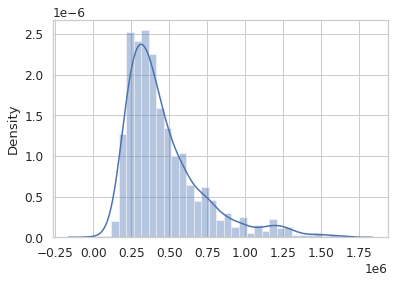

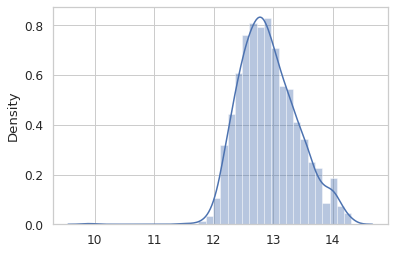

In [49]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1#

sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)

#Quick Analysis of House Price Data
x = ys_train
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

x_log = np.log(x)
sns.distplot(x_log)
plt.show()

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

In [50]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,235.8


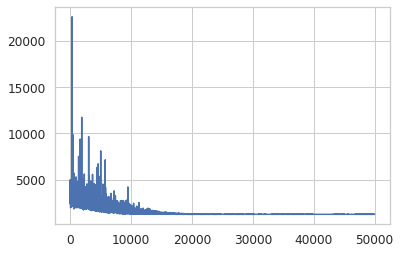

In [51]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter, method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [52]:
# samples from the posterior
posterior = approximation.sample(5000)

In [53]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  107117.9478322499
MAPE =  0.23623066847105229


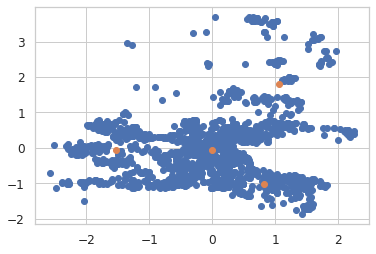

In [54]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1, 2
ind=[3,4]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])

In [55]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 168, 1: 607, 2: 224, 3: 233}

In [56]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 47, 1: 147, 2: 57, 3: 58}

In [57]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]
ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [58]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [59]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [60]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [61]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)


Finished [100%]: Average Loss = 200.93


In [62]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 618.81


In [63]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 260.84


Your comments, explanation, and references here.

In [64]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 248.87


In [65]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

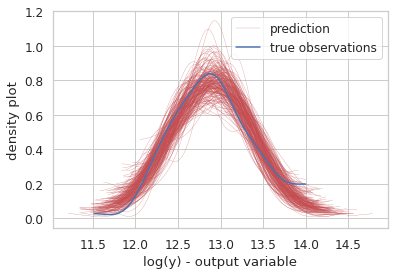

In [66]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

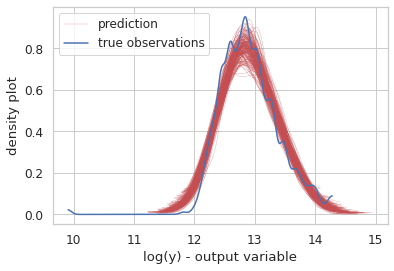

In [67]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

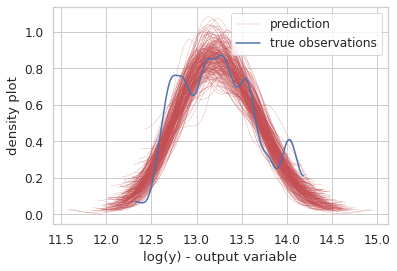

In [68]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

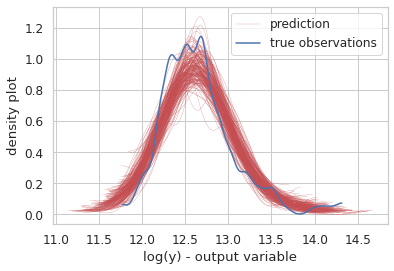

In [69]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [70]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# joint MAPE
joint_MAPE=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]) / y_test[clusters_test==0],
                     abs(y_pred_BLR1 - y_test[clusters_test==1]) / y_test[clusters_test==1],
                     abs(y_pred_BLR2 - y_test[clusters_test==2]) / y_test[clusters_test==2],
                     abs(y_pred_BLR3 - y_test[clusters_test==3]) / y_test[clusters_test==3]
                    ])

# MAE
print("MAE=",np.mean(joint))

# MAPE
print("MAPE=",np.mean(joint_MAPE))

Size Cluster0 47 , MAE Cluster0= 105887.24160678509
Size Cluster1 147 , MAE Cluster1= 105014.61766288242
Size Cluster2 57 , MAE Cluster2= 96609.0869159471
Size Cluster3 58 , MAE Cluster3= 71462.6737486279
MAE= 97299.03619285442
MAPE= 0.21757892894253222


In [71]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [72]:
# your code here

# REFERENCES

Thatdatatho.com. 2021. Predicting Housing Prices with Natural Language Processing NLP and Tidymodels. [online] Available at: <https://thatdatatho.com/predicting-housing-prices-nlp/> [Accessed 8 October 2021]

Medium. 2021. House Prices Prediction Using Deep Learning. [online] Available at: <https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154> [Accessed 8 October 2021]




# SUMMARY

Your summary here.